In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [ 210501, 210508 , 210515, 210522 , 210529 , 210605 , 210612 , 210619 , 210626 , 210703 , 210710 , 210717 , 210724 , 210731 , 210807, 210814 , 210821, 210828 ]
DF = get_data(week_nums)
DF2 = get_data(week_nums)

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768021 entries, 0 to 209067
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [4]:
DF.columns = [column.strip() for column in DF.columns]

In [5]:
DF["DATE_TIME"] = pd.to_datetime(DF.DATE + " " + DF.TIME, format="%m/%d/%Y %H:%M:%S")
DF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


In [6]:
(DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
321042,B024,R211,00-05-00,KINGS HWY,2021-05-02 20:00:00,2
3400922,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-24 16:00:00,2
321048,B024,R211,00-05-00,KINGS HWY,2021-05-03 20:00:00,2
321047,B024,R211,00-05-00,KINGS HWY,2021-05-03 16:00:00,2
321046,B024,R211,00-05-00,KINGS HWY,2021-05-03 12:00:00,2
321045,B024,R211,00-05-00,KINGS HWY,2021-05-03 08:00:00,2
321043,B024,R211,00-05-00,KINGS HWY,2021-05-03 00:00:00,2
321041,B024,R211,00-05-00,KINGS HWY,2021-05-02 16:00:00,2
321040,B024,R211,00-05-00,KINGS HWY,2021-05-02 12:00:00,2
321039,B024,R211,00-05-00,KINGS HWY,2021-05-02 08:00:00,2


In [7]:
DF.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
DF.drop_duplicates( subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True )

In [8]:
(DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
2511958,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 02:00:00,1
2511960,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 10:00:00,1
2511961,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 14:00:00,1
2511962,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 18:00:00,1
2511963,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 22:00:00,1
2511964,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 02:00:00,1
2511965,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 06:00:00,1
2511966,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 10:00:00,1
2511967,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 14:00:00,1


In [9]:
DF = DF.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [10]:
Daily = (DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [11]:
Daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,7561578
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968
6,A002,R051,02-00-00,59 ST,04/30/2021,7564517
7,A002,R051,02-00-00,59 ST,05/01/2021,7564974
8,A002,R051,02-00-00,59 ST,05/02/2021,7565300
9,A002,R051,02-00-00,59 ST,05/03/2021,7565798


In [12]:
Daily[["PREV_DATE", "PREV_ENTRIES"]] = (Daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-12-03551c1a871b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Daily[["PREV_DATE", "PREV_ENTRIES"]] = (Daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [13]:
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,7561578,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0


In [14]:
Daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968,04/28/2021,7563448.0


In [15]:
Daily[Daily["ENTRIES"] < Daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
4915,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609447,04/24/2021,885609604.0
4916,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609261,04/25/2021,885609447.0
4917,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609037,04/26/2021,885609261.0
4918,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608798,04/27/2021,885609037.0
4919,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608538,04/28/2021,885608798.0


In [19]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

Daily["DAILY_ENTRIES"] = Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3082 1390173.0
18 4340953.0
14 1028362.0
327680 756269765.0
353 8049630.0
0 5309746.0
101 2651127.0
167790157 702266.0
48 8724126.0
24 2627860.0
153 1604971.0
5946 4298704.0
0 117440512.0
135 8882903.0
113 4454729.0
158 7643335.0
327975 7577027.0
217 4780275.0
4 1534984197.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517611 82.0
36 1198448.0
46 5405351.0
687970551 19471253.0
200 705357551.0
1076 7489966.0
16777220 1037157.0
463 6101664.0
162 1110928.0
6 16034831.0
327 2524852.0
262150 2393328.0
67436550 375578.0
143 4070964.0
5 58304715.0
386 6213955.0
37 1950780.0
443 15689395.0
528 2341721.0
2 33030303.0
8 1255797.0
95 5198958.0
126 3102523.0
50362839 251769.0
77 2320032.0
114 1953264.0
169 4788322.0
393362 104110933.0
82 6249985.0
118 909043641.0
197214 1890967.0
196847 3277233.0
87 303654987.0
716 3145979.0
35 10737302.0
146668889 1123536132.0
1191142711 12133750.0
1441950 12919101.0
13943099 8899046.0
62 4183413.0
142 1653213.0
395 11851520.0
91 1925928.0
327683 

In [20]:
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0,265.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0,457.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0,573.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0,575.0
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968,04/28/2021,7563448.0,520.0


In [21]:
station_daily = Daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,04/25/2021,4578.0
1,1 AV,04/26/2021,6686.0
2,1 AV,04/27/2021,6895.0
3,1 AV,04/28/2021,7118.0
4,1 AV,04/29/2021,7144.0


In [22]:
station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

station_totals.head(3)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,6240904.0
1,FULTON ST,4830139.0
2,34 ST-HERALD SQ,4715722.0


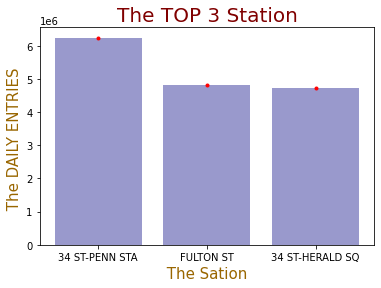

In [23]:
x=station_totals.head(3)
plt.bar(x["STATION"],x["DAILY_ENTRIES"],color='#9999CC');
plt.ylabel(" The DAILY ENTRIES  ", fontsize = 15 ,color='#996600' )
plt.xlabel(" The Sation ", fontsize = 15 ,color='#996600' )
plt.title("The TOP 3 Station", fontsize = 20,color='maroon')
plt.errorbar(x["STATION"],x["DAILY_ENTRIES"], fmt='r.' );

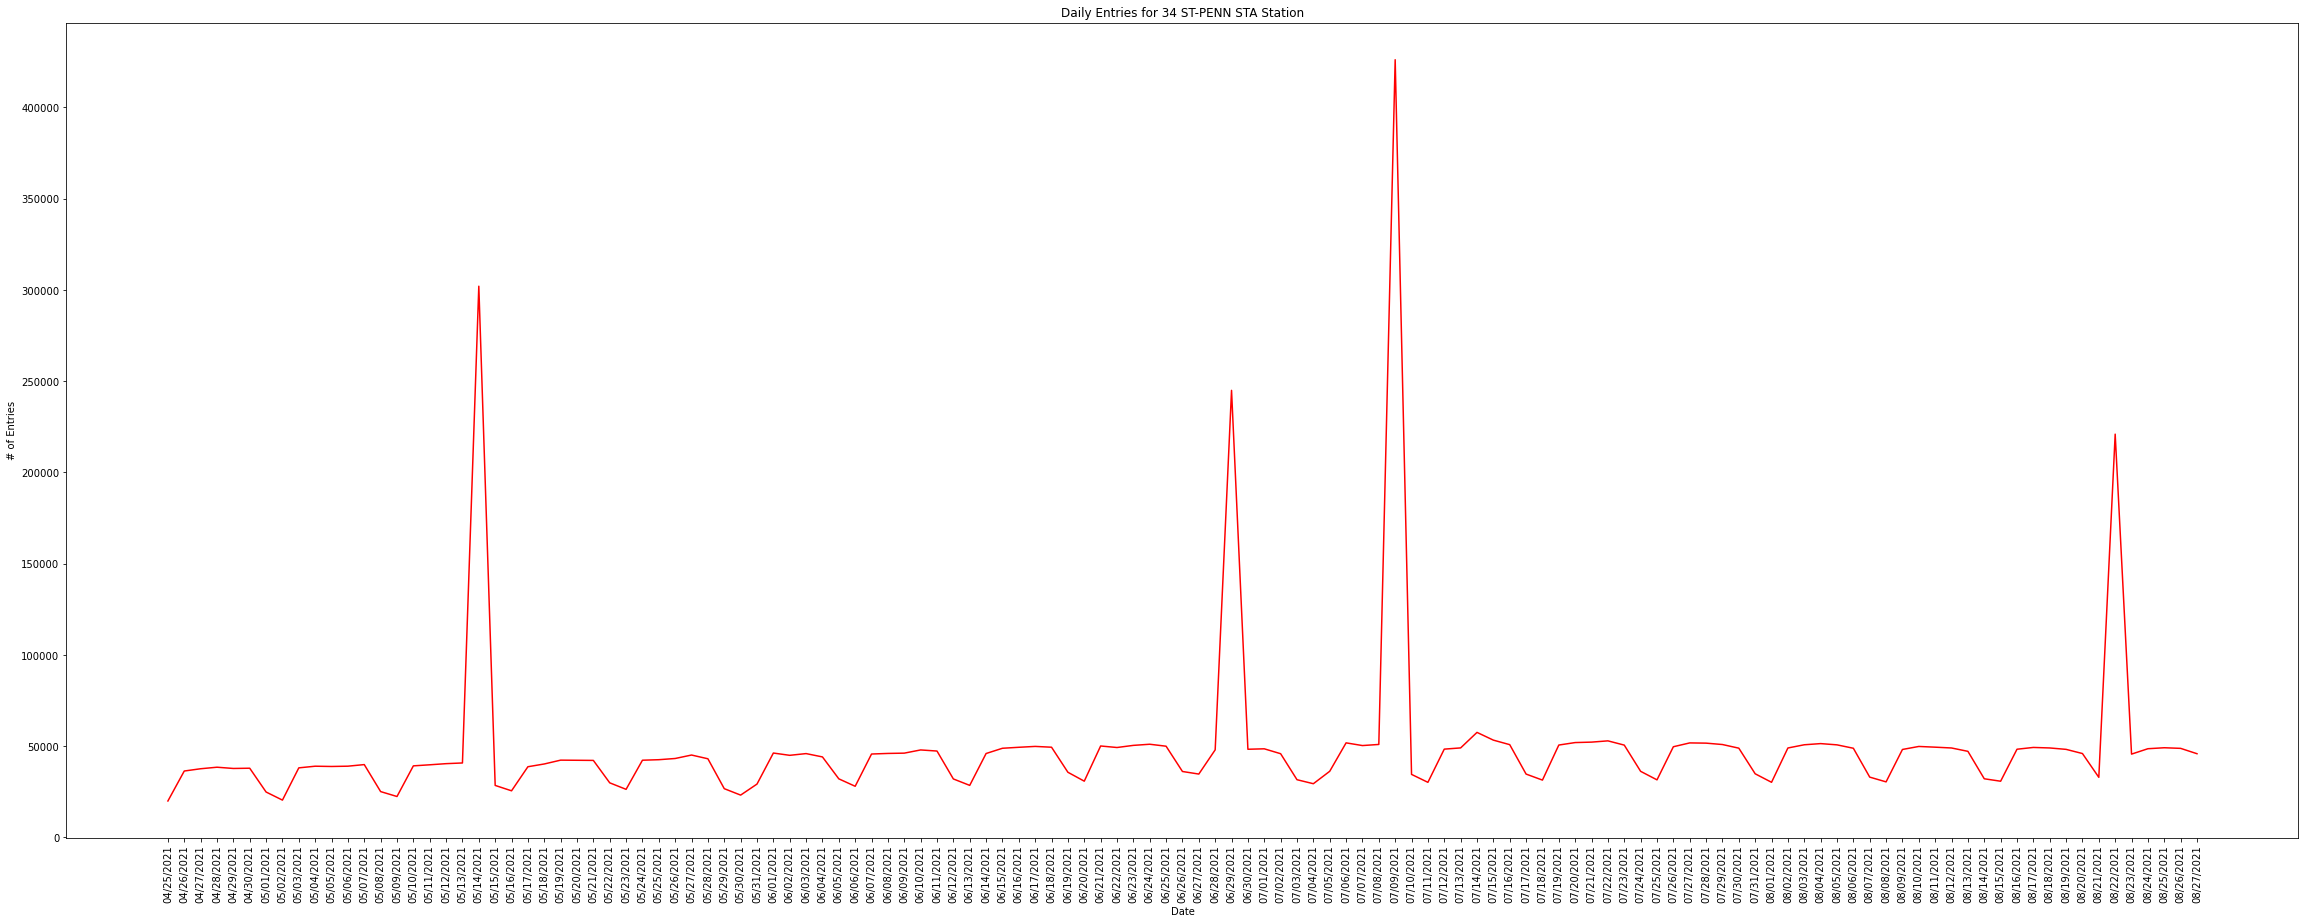

In [24]:
station_daily_34S_TA = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
plt.figure(figsize=(40,15))
plt.plot(station_daily_34S_TA['DATE'], station_daily_34S_TA['DAILY_ENTRIES'], c = "r")
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for 34 ST-PENN STA Station');


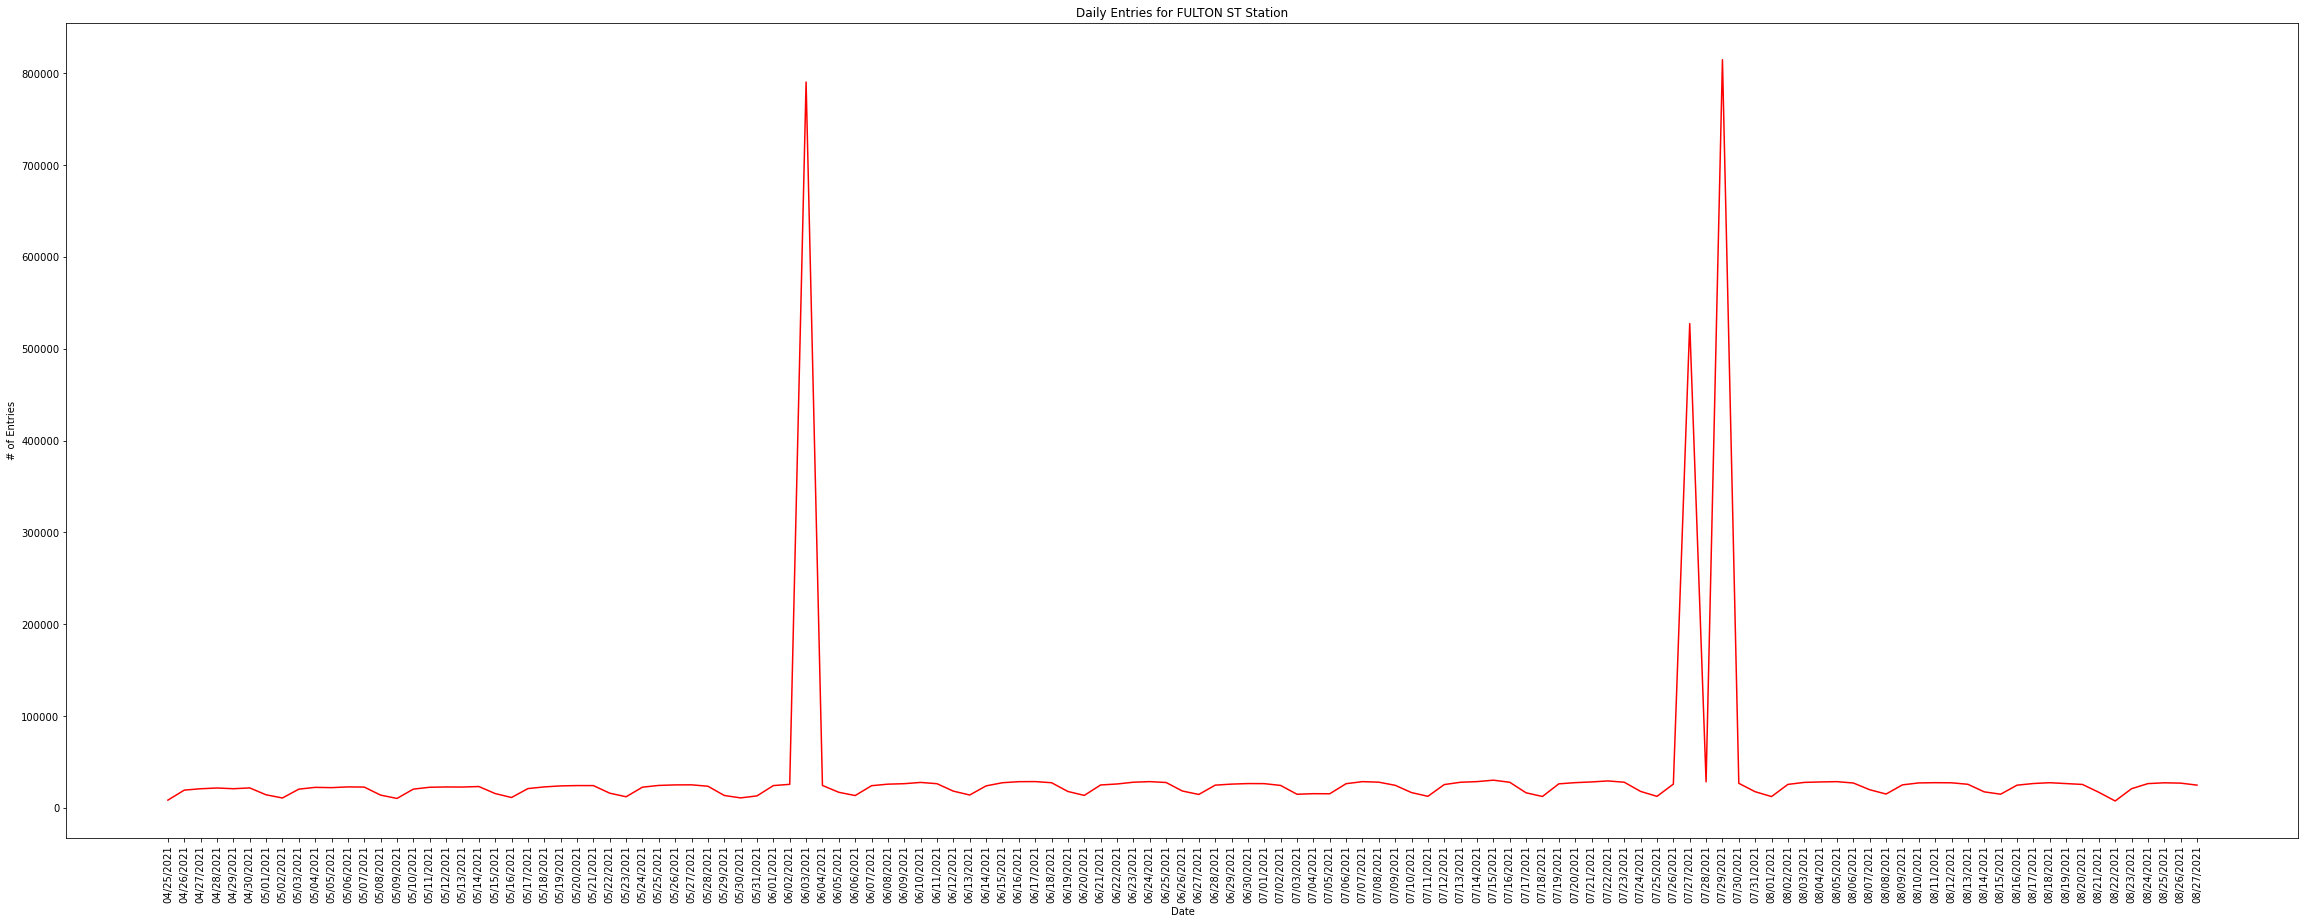

In [25]:
station_daily_FULTON_ST = station_daily[station_daily['STATION'] == 'FULTON ST']
plt.figure(figsize=(40,15))
plt.plot(station_daily_FULTON_ST['DATE'], station_daily_FULTON_ST['DAILY_ENTRIES'], c="r")
plt.ylabel('# of Entries')
plt.xlabel('Date' )
plt.xticks(rotation=90)
plt.title('Daily Entries for FULTON ST Station');




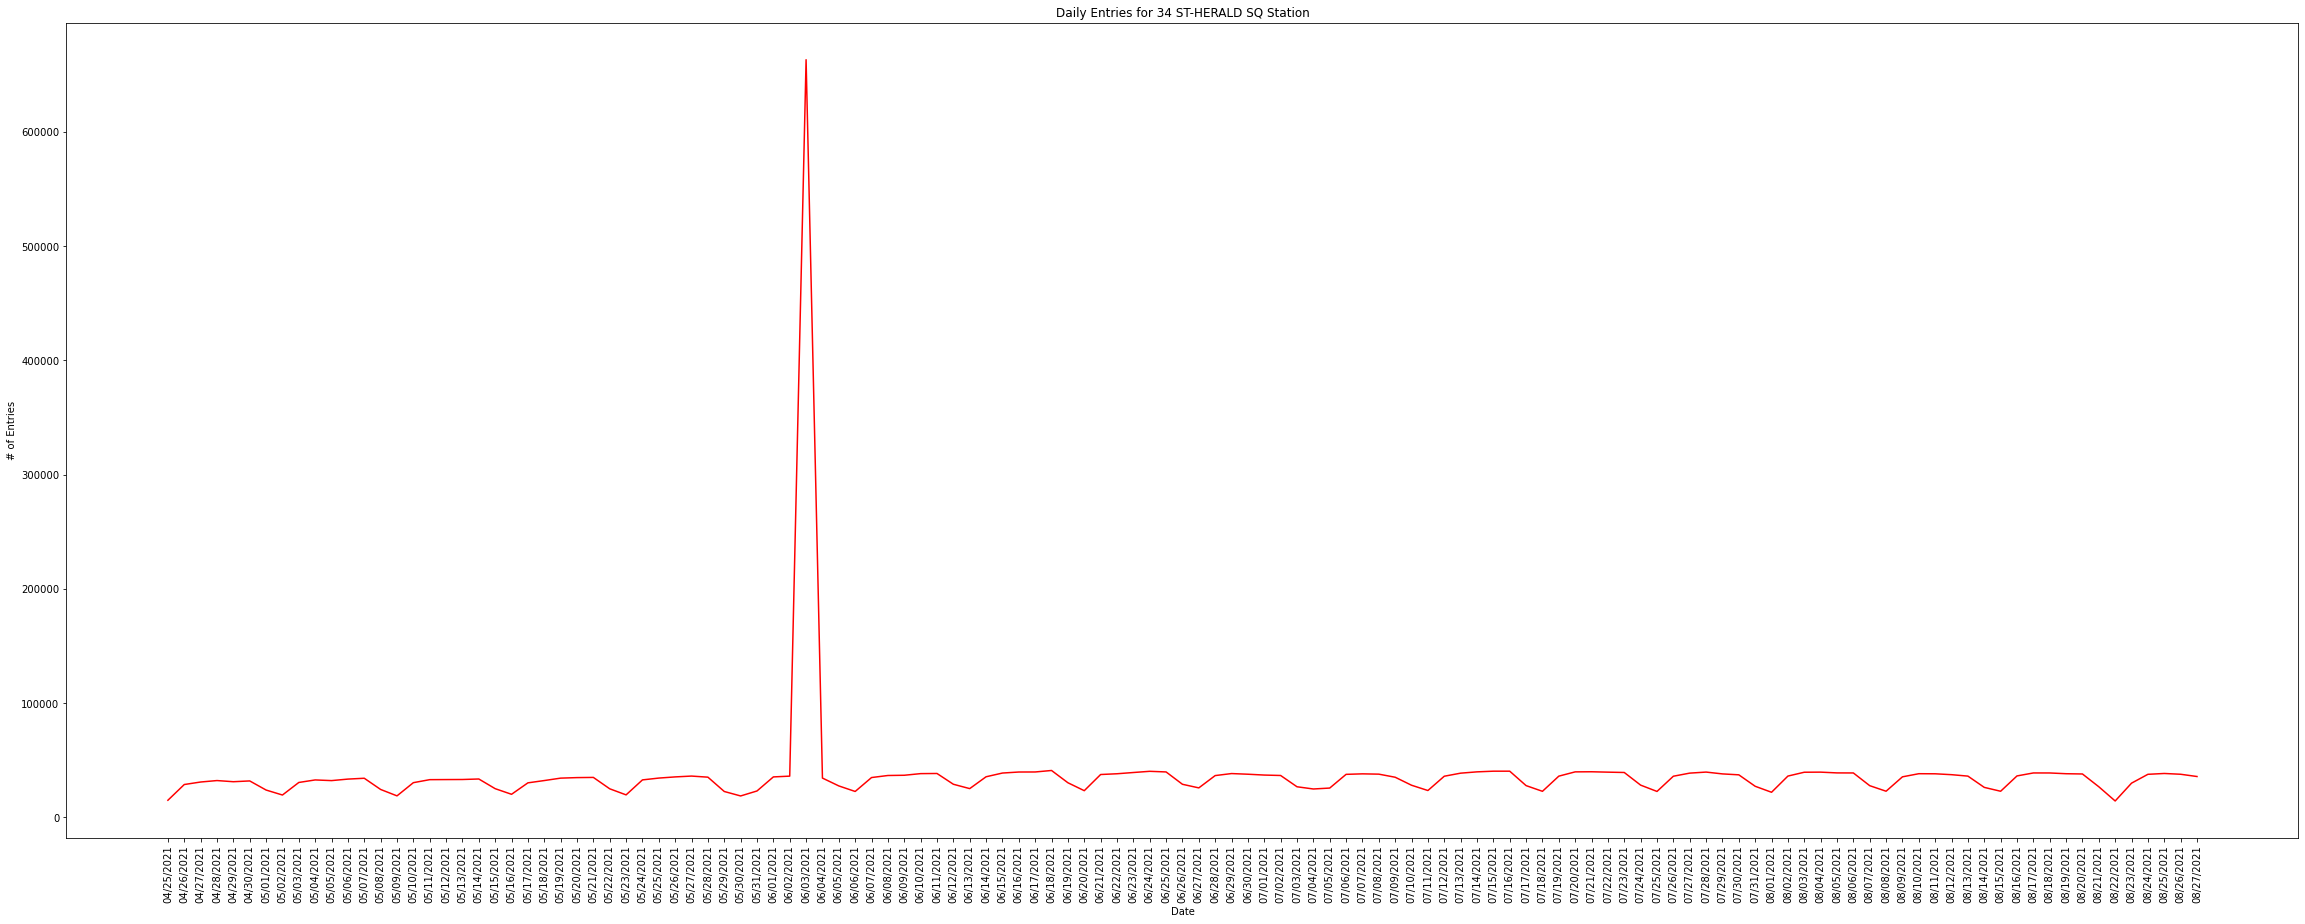

In [26]:
station_daily_34_SQ = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ']
plt.figure(figsize=(40,15))
plt.plot(station_daily_34_SQ['DATE'], station_daily_34_SQ['DAILY_ENTRIES'], c="r")
plt.ylabel('# of Entries')
plt.xlabel('Date' )
plt.xticks(rotation=90)
plt.title('Daily Entries for 34 ST-HERALD SQ Station');


In [27]:
Daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624187 entries, 1 to 629218
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   C/A            624187 non-null  object 
 1   UNIT           624187 non-null  object 
 2   SCP            624187 non-null  object 
 3   STATION        624187 non-null  object 
 4   DATE           624187 non-null  object 
 5   ENTRIES        624187 non-null  int64  
 6   PREV_DATE      624187 non-null  object 
 7   PREV_ENTRIES   624187 non-null  float64
 8   DAILY_ENTRIES  624187 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 47.6+ MB


In [28]:
DF2.columns = [column.strip() for column in DF2.columns]

In [29]:
DF2["DATE_TIME"] = pd.to_datetime(DF2.DATE + " " + DF2.TIME, format="%m/%d/%Y %H:%M:%S")
DF2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


In [30]:
DF2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
DF2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [31]:
DF = DF.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [32]:
Daily2 = (DF2
            .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME" ,"DATE_TIME"],as_index=False)
            .ENTRIES.first())

In [33]:
Daily2[["PREV_DATE", "PREV_ENTRIES"]] = (Daily2
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION","LINENAME"])["DATE_TIME","ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

Daily2.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-33-baa31c328e4f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Daily2[["PREV_DATE", "PREV_ENTRIES"]] = (Daily2


In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

Daily2["Daily_ENTRIES2"] = Daily2.apply(get_daily_counts, axis=1, max_counter=100000)

6 154694.0
3082 1390173.0
29 479907.0
18 4341004.0
14 1028362.0
16 765804.0
5 150038.0
327680 756269765.0
39 328024.0
25 262152.0
193 8049630.0
0 5309746.0
458752 24.0
16 2651127.0
458754 262214.0
2 458758.0
167790067 702272.0
31 8724126.0
6 106396.0
458753 262144.0
54 659349.0
393216 728.0
327680 4.0
1 327690.0
9 2627869.0
67 1605140.0
5671 4298891.0
0 117440512.0
250918 6349746.0
6349790 250918.0
2597061 3500726.0
3500758 2597061.0
8986986 29107.0
29159 8986986.0
47891 5547879.0
5547913 47891.0
11310395 1893633.0
1893734 11310395.0
262209 689409.0
689419 262209.0
83 367525.0
135 8883051.0
25 157816.0
54 4454753.0
76 7643369.0
10 500619.0
327680 7577112.0
44 4780276.0
26 490316.0
4 1534984197.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
51 755149.0
12517553 147.0
14 1198448.0
37 305512.0
46 5405537.0
687970041 19471254.0
23 705357551.0
30 7489966.0
16777220 1037161.0
35 6101664.0
4825276 12538719.0
12538962 4825375.0
1657902 1110928.0
101 1657978.0
6 16034831.0
231 252

In [37]:
Daily2

,C/A,UNIT,SCP,STATION,LINENAME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,Daily_ENTRIES2
1,A002,R051,02-00-00,59 ST,NQR456W,2021-04-24 04:00:00,7561295,2021-04-24 00:00:00,7561288.0,7.0
2,A002,R051,02-00-00,59 ST,NQR456W,2021-04-24 08:00:00,7561302,2021-04-24 04:00:00,7561295.0,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,2021-04-24 12:00:00,7561336,2021-04-24 08:00:00,7561302.0,34.0
4,A002,R051,02-00-00,59 ST,NQR456W,2021-04-24 16:00:00,7561426,2021-04-24 12:00:00,7561336.0,90.0
5,A002,R051,02-00-00,59 ST,NQR456W,2021-04-24 20:00:00,7561578,2021-04-24 16:00:00,7561426.0,152.0
...,...,...,...,...,...,...,...,...,...,...
3767946,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-08-27 05:00:00,5554,2021-08-27 01:00:00,5554.0,0.0
3767947,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-08-27 09:00:00,5554,2021-08-27 05:00:00,5554.0,0.0
3767948,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-08-27 13:00:00,5554,2021-08-27 09:00:00,5554.0,0.0
3767949,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-08-27 17:00:00,5554,2021-08-27 13:00:00,5554.0,0.0


In [38]:
mask = (Daily2.LINENAME.str.contains('1'))
Daily2 = Daily2[mask]
Daily2['DAY'] = Daily2['DATE_TIME'].dt.day_name()
weeks = Daily2.groupby('DAY').mean()
mask = (Daily2.DAY == 'Sunday') & (Daily2.STATION == '34 ST-PENN STA') 
Daily2 = Daily2[mask]
Daily2.set_index(["DATE_TIME"],inplace= True)
x = Daily2.between_time('00:00:00', '12:59:00')
hours = x.groupby(x.index.hour).mean()
h = ['12 AM','2 AM', '4 AM', '6 AM', '8 AM','10 AM', '12 PM']
nh = []
hours

<ipython-input-38-b054b50558d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily2['DAY'] = Daily2['DATE_TIME'].dt.day_name()


,ENTRIES,PREV_ENTRIES,Daily_ENTRIES2
DATE_TIME,,,
0,4.202158e+06,4.202117e+06,41.560647
2,1.244643e+08,1.244643e+08,37.388393
4,4.212979e+06,4.212971e+06,7.727027
6,1.244643e+08,1.244643e+08,5.640625
8,4.212987e+06,4.212979e+06,8.013514
10,1.244644e+08,1.244643e+08,33.245536
12,4.189028e+06,4.189004e+06,24.528455


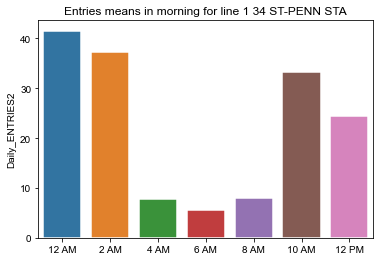

In [39]:
import seaborn as sns

plt.ylabel('Individual Entries')
plt.title("Entries means in morning for line 1 34 ST-PENN STA")

sns.set_style("whitegrid")
sns.set_context("talk")
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.barplot( x = h ,y = hours.Daily_ENTRIES2, data= hours);
